## This code is written based on the lessons from Data Science Bootcamp by Udemy. 

### __Data Gathering__

In [0]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D # for 3d plotting
from matplotlib import cm # color map
from math import log # importing logaryphm
from sympy import symbols, diff # symbolic module of Python (symbols - to write math notation, diff - differentiate math functions)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # import inbuilt function

# to show charts as it is in the notebook:
%matplotlib inline 

In [0]:
data = pd.read_csv('/content/3.1 cost_revenue_clean.csv.csv')

In [0]:
data.head()

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527


In [0]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [0]:
# Create dataframes for our dependant and independant variables
x = DataFrame(data, columns=['production_budget_usd'])
y = DataFrame(data, columns=['worldwide_gross_usd'])

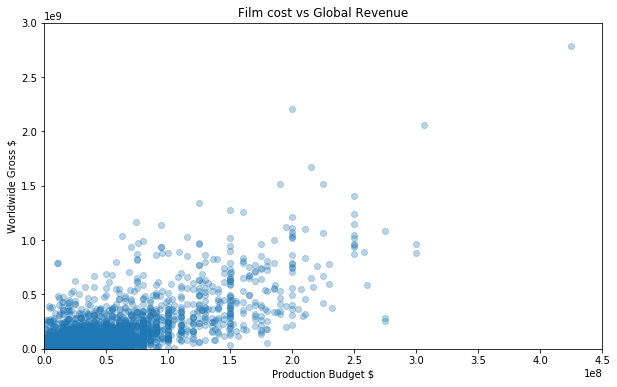

In [0]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('Film cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [0]:
regression = LinearRegression()
regression.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__Slop coefficient__

In [0]:
regression.coef_[0][0]

3.1115091829361265

In [0]:
# Intercept
regression.intercept_[0]

-7236192.729139581

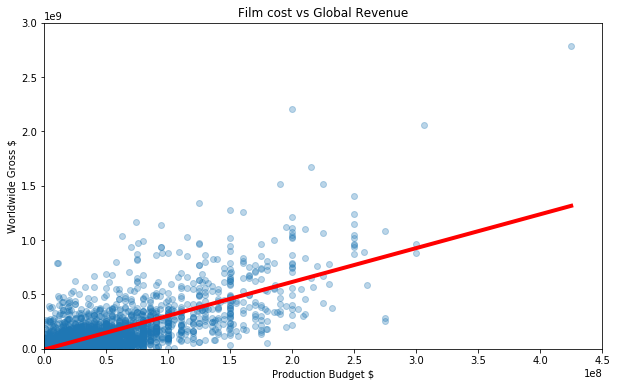

In [0]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3)
plt.plot(x, regression.predict(x), color='red', linewidth=4)
plt.title('Film cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.style.use('fivethirtyeight')
plt.show()

In [0]:
# R-Square
regression.score(x, y)

0.5496485356985729

### __Coding style__


PEP 8, sometimes spelled PEP8 or PEP-8, is a document that provides guidelines and best practices on how to write Python code. It was written in 2001 by Guido van Rossum, Barry Warsaw, and Nick Coghlan. The primary focus of PEP 8 is to improve the readability and consistency of Python code.

https://realpython.com/python-pep8/

### __Cost Functions__
#### Simple cost function
### $$f(x) = x^2 + x + 1$$

In [0]:
def f(x):
  return x**2 + x + 1

In [0]:
# Make data
x_1 = np.linspace(start=-3, stop=3, num=100)

In [0]:
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

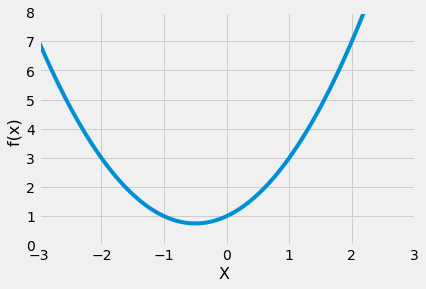

In [0]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X ', fontsize=16)
plt.ylabel('f(x) ', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### __Slop and Derivatives__

Challenge: create a Python function for the derivative of *f(x)* called *df(x)*

In [0]:
def df(x):
  return 2*x + 1

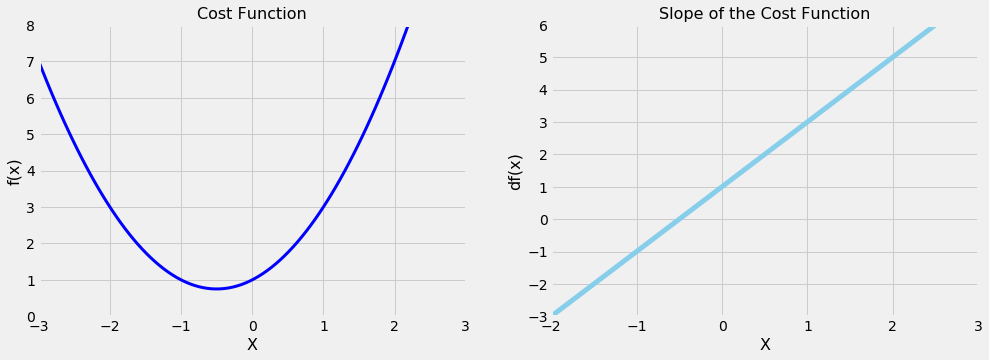

In [0]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of the Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### __Python Loops & Gradient Descent__

![image.png](https://hvidberrrg.github.io/deep_learning/optimization_and_backpropagation/assets/gradient_descent_example.png)

In [0]:
# Python For loop
for n in range(5):
  print('Hello World')
print('End of the loop')

Hello World
Hello World
Hello World
Hello World
Hello World
End of the loop


In [0]:
# Python While loop
counter = 0
while counter < 7:
  print('Counting counter...', counter)
  counter = counter + 1
print('End of the loop')

Counting counter... 0
Counting counter... 1
Counting counter... 2
Counting counter... 3
Counting counter... 4
Counting counter... 5
Counting counter... 6
End of the loop


In [0]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range (500):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient
  
  step_size = abs(new_x - previous_x)
  print(step_size)

  x_list.append(new_x)
  slope_list.append(df(new_x))

  if step_size < precision:
    print('Loop ran this many times: ', n)
    break

print('Local minimum occurs at: ', new_x)
print('Slope of df(x) value at this point is: ', df(new_x))
print('f(x) or the cost at this point is: ', f(new_x))

0.7000000000000002
0.56
0.44799999999999995
0.35840000000000005
0.28672
0.22937600000000002
0.18350079999999996
0.14680063999999998
0.11744051199999997
0.09395240959999998
0.07516192767999996
0.06012954214399996
0.04810363371519999
0.03848290697216
0.03078632557772798
0.024629060462182384
0.019703248369745907
0.015762598695796715
0.012610078956637405
0.010088063165309913
0.00807045053224792
0.006456360425798335
0.005165088340638668
0.0041320706725109235
0.003305656538008739
0.0026445252304070355
0.002115620184325595
0.001692496147460476
0.001353996917968392
0.0010831975343746914
0.0008665580274997975
0.0006932464219998047
0.000554597137599866
0.00044367771007985946
0.00035494216806392087
0.0002839537344511145
0.0002271629875609249
0.00018173039004870661
0.0001453843120389764
0.00011630744963120332
9.304595970494045e-05
Loop ran this many times:  40
Local minimum occurs at:  -0.49962781616118024
Slope of df(x) value at this point is:  0.0007443676776395236
f(x) or the cost at this point

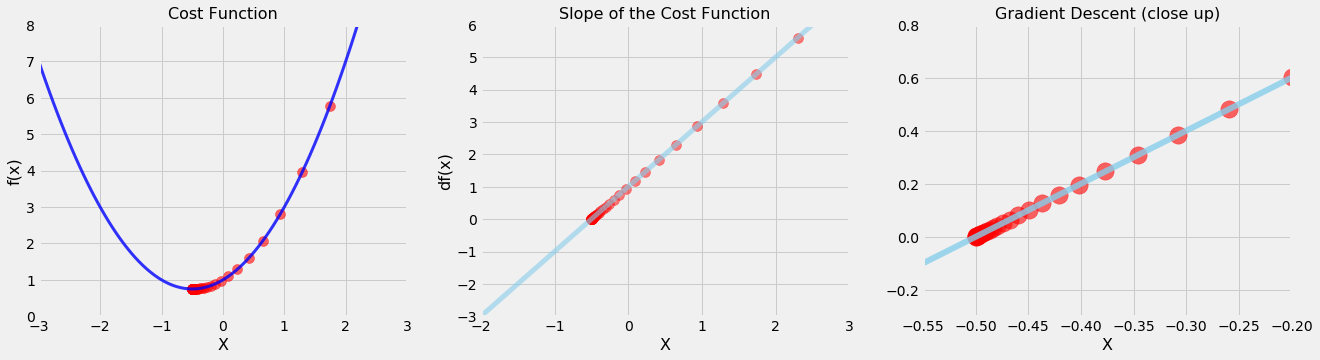

In [0]:
# Superimpose the gradient descent calculations on plot 

plt.figure(figsize=[20, 5])

# Chart 1: Cost function
plt.subplot(1, 3, 1)
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title('Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 3, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.title('Slope of the Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 3: Derivative (Close Up)
plt.subplot(1, 3, 3)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.title('Gradient Descent (close up)', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()

### __Example 2 - Multiple Minima vs Initial Guess & Advanced Functions__
### $$g(x) = x^4 - 4x^2 + 5$$

In [0]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

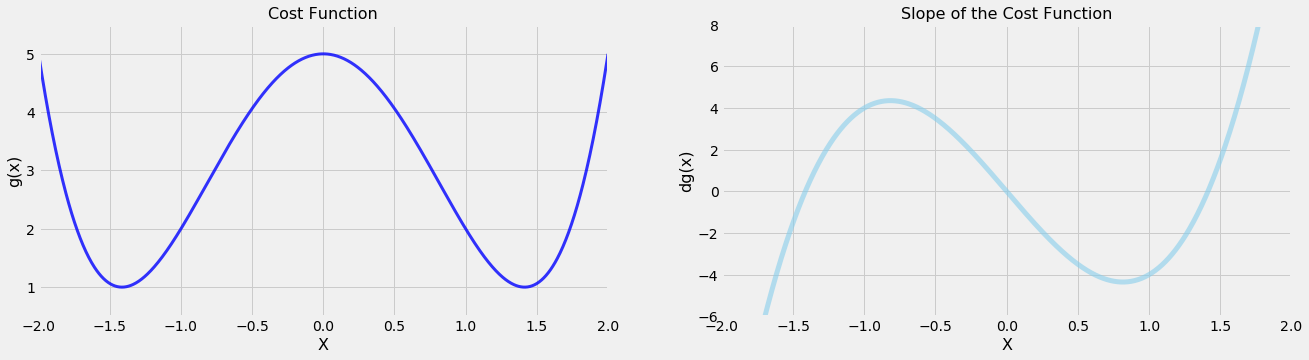

In [0]:
# Superimpose the gradient descent calculations on plot 

plt.figure(figsize=[20, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)

# Chart 2: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)

plt.show()

### __Gradient Descent as a Python Function__

In [0]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
  # ctrl + ]
  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range (max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      break
  return new_x, x_list, slope_list


In [0]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [0]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02, precision=0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


In [0]:
# We deleted the arguments Multiplier and Precision because we specified them as default values
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


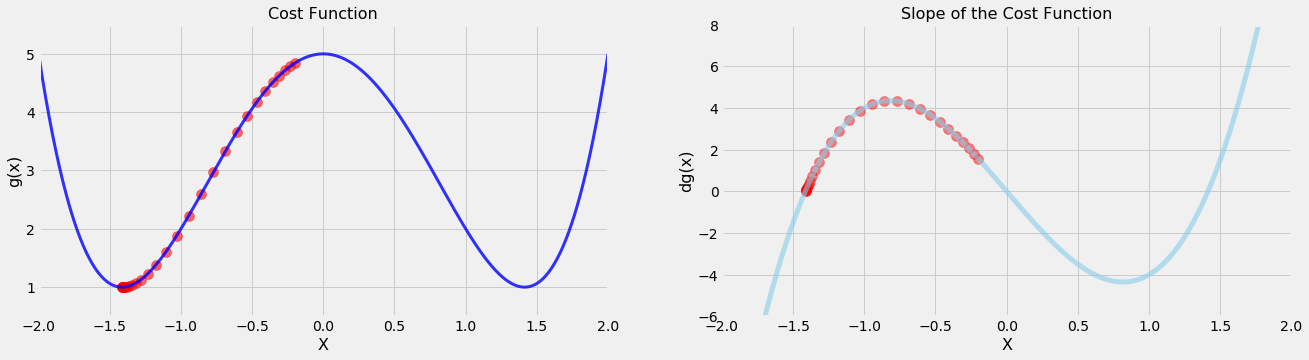

In [0]:
# Calling gradient descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.2, multiplier=0.02, precision=0.001)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

values = np.array(x_list)

# Chart 2: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### __Example 3 - Divergence, Overflow and Python Tuples__

#### $$h(x) = x^5 - 2x^4 + 2$$

In [0]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
  return x**5 - 2*x**4 + 2

def dh(x):
  return 5*x**4 - 8*x**3

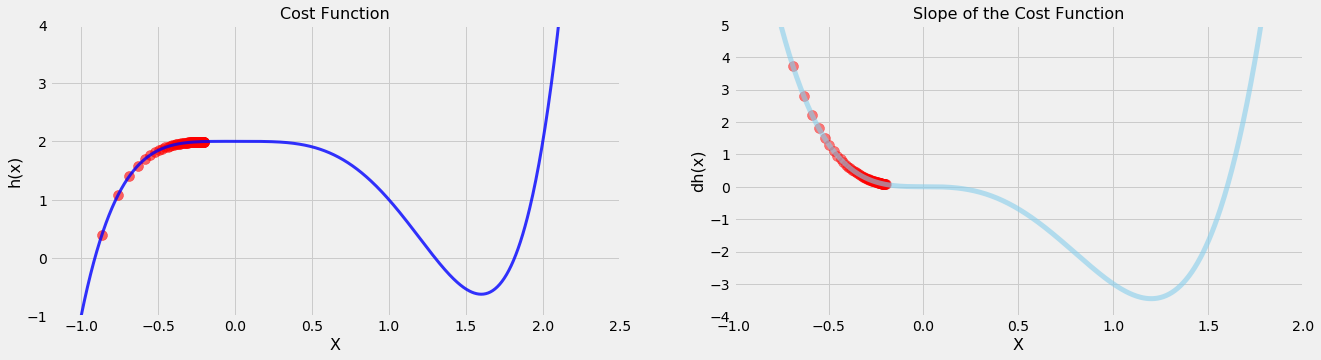

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [0]:
# Calling gradient descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title('Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

values = np.array(x_list)

# Chart 2: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.title('Slope of the Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [0]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

### __Python Tuples__

In [0]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I looooove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

# Tuple quite often can include mixed type of values
not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

# Tuple is imutable: breakfast[0] = 'sausage' - 
# TypeError: 'tuple' object does not support item assignment

tuple_with_single_value = 42,
print(tuple_with_single_value)

main, side, greens = breakfast
print('Main course is ', main)

# We actually use tuple in our Gradient Descent function (return three values)
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps', len(data_tuple[1]))


I looooove  bacon
My hotel has no 4th floor
(42,)
Main course is  bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps 117


### __Learning Rate__

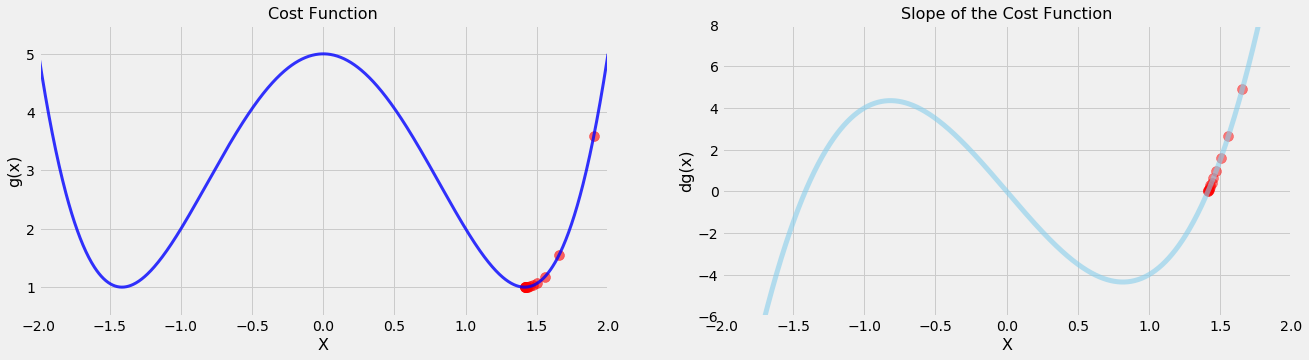

The number of steps is:  14


In [0]:
# Calling gradient descent function 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title('Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

values = np.array(x_list)

# Chart 2: Derivative
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title('Slope of the Cost Function', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('The number of steps is: ', len(list_x))

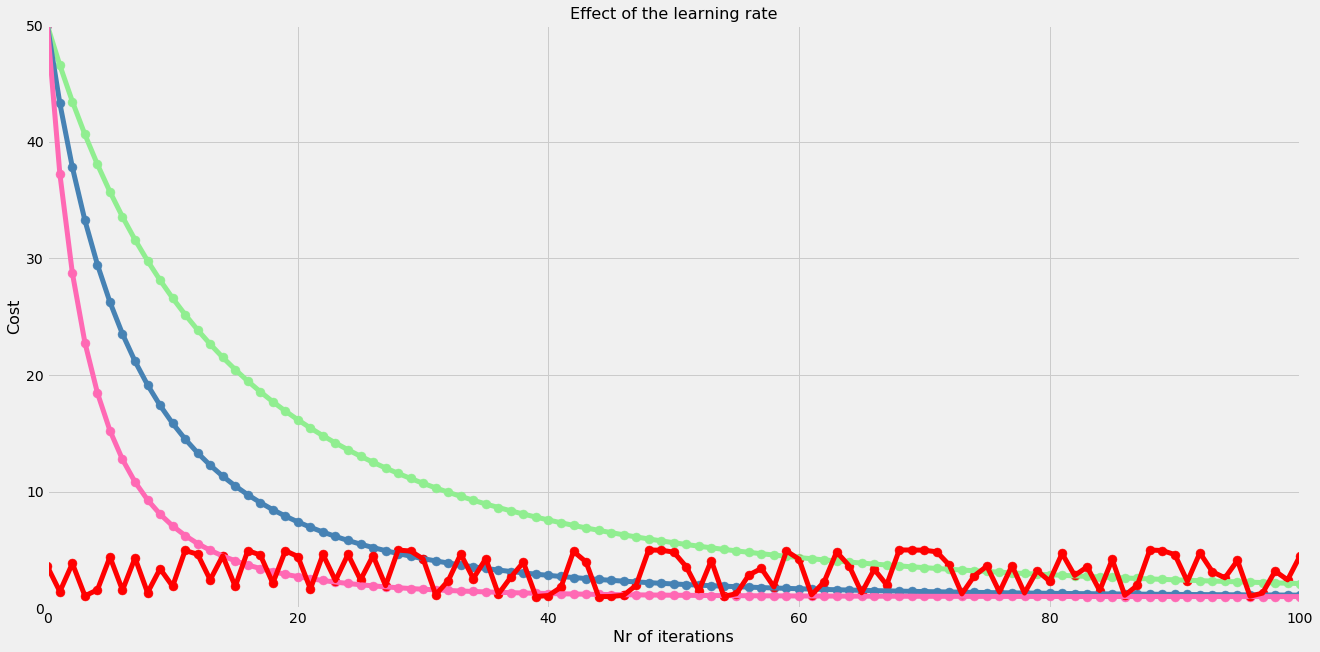

In [0]:
# Run gradient descent 3 times
n = 100 
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

# Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=16)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
# Add scatter to see each step of cost function
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
# Add scatter to see each step of cost function
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
# Add scatter to see each step of cost function
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
# Add scatter to see each step of cost function
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()

We can see above the decrease of the cost in each iteration of the different learning rates. We can observe that the pink line shows the fastest learning rate and the green one shows the lowes learning rate, so we need more iterations to reach the minimum. 

Insane gamma shows that initial_guess plays an important role and in general - picking a good learning rate for a cost function is kind of the art. Every time we need to tune it in order to get the optimal learning rate. 

One simple technic is called *Bold Driver*: "*increase the learning rate by 5% if you have a reduction in your error rate, and go back one step and decrease the learning rate by 50% if you increase in your error(cost)"*  

### __Example 4 - Data Viz with 3D Charts__
#### __Minimise__ $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [0]:
def f(x, y):
  r = 3**(-x**2 - y**2)
  return 1 / (r + 1)

In [0]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

# Transform our values into two dimentional arrays for 3d plotting
x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


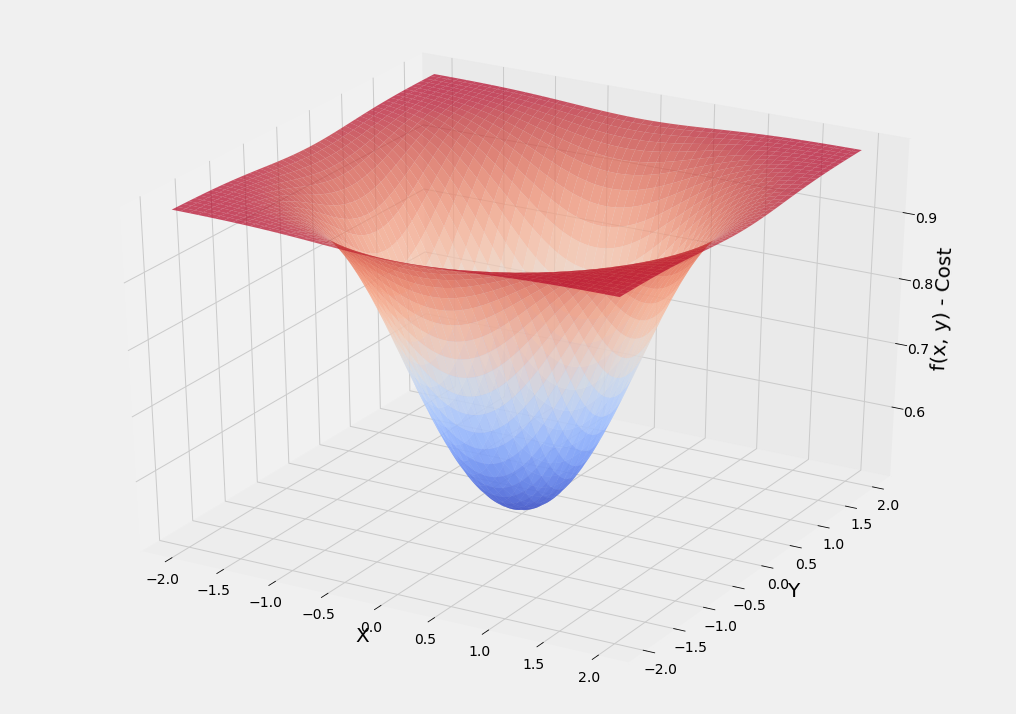

In [0]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Use different colormaps from the documentation of Matplotlib
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.7)

plt.show()

### __Partial Derivatives & Symbolic Computation__

$$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

$$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [0]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivatives wrt x is: ', diff(f(a, b), b))
print('Value of f(x, y) at x=1.8, y=1.0 is: ', f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print ('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivatives wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


### __Batch Gradient Descent with SymPy__

In [0]:
# Setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

# We calculate the cost, how far away we are from the minimum based on steepness of the slope
for n in range(max_iter):
  gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
  gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients 

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [0]:
# Partial derivative functions example 4
def fpx(x, y):
  r = 3**(-x**2 - y**2)
  return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
  r = 3**(-x**2 - y**2)
  return 2*y*log(3)*r / (r + 1)**2 

In [0]:
fpx(1.8, 1.0)

0.036808971619750504

In [0]:
# Setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
  gradient_x = fpx(params[0], params[1]) 
  gradient_y = fpy(params[0], params[1]) 
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients 

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


We found out that SymPy works slower when it comes to running optimisation algorithm

### __Graphing 3D Gradient Descent & Adv Numpy Arrays__

In [0]:
# Setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
  gradient_x = fpx(params[0], params[1]) 
  gradient_y = fpy(params[0], params[1]) 
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients 
  # values_array = np.append(values_array, params.reshape(1, 2), axis=0)
  values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0) # it does the same as the previous line

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


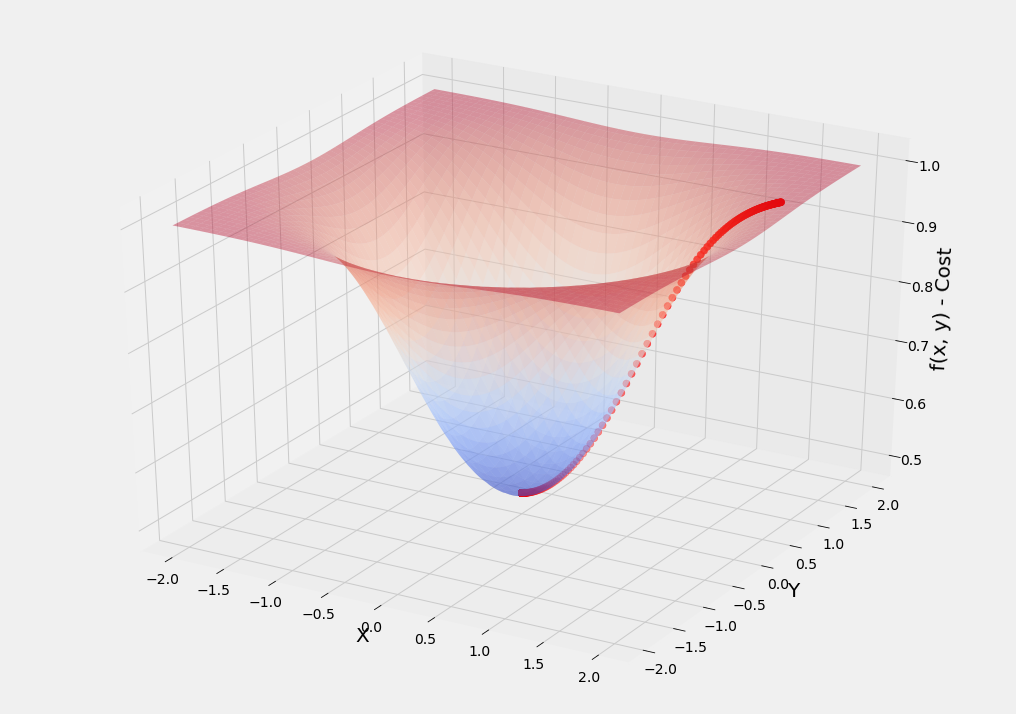

In [0]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [0]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]: ', hs_band[0])
print('hs_band[0][1]: ', hs_band[0][1])
print('hs_band[1][0]: ', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing  band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]:  ['Black Thought' 'MC']
hs_band[0][1]:  MC
hs_band[1][0]:  Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing  band roles... ['MC' 'Drums' 'Guitar' 'MC']


### __Example 5 - Working with Data & a Real Cost Function__
#### __Mean Squared Error: a cost function for regression problems__
$$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y} \big)^2$$

In [0]:
# Make sample data
x_5 = np.array([[0.1, 0.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # transpose reshape array into 2-dimentional
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) # also reshape the array into 2-timentional

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [0]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 1.339268704870178
Theta 1: 1.1227531110769708


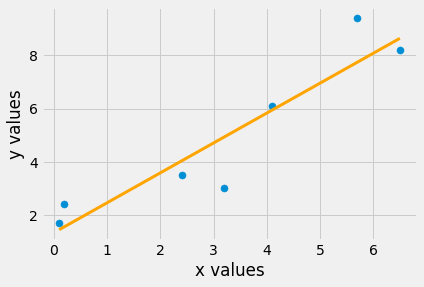

In [0]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [0]:
# y_hat = theta0 + theta1 * x
y_hat = 1.339268704870178 + 1.1227531110769708 * x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[1.45154402]
 [1.56381933]
 [4.03387617]
 [4.93207866]
 [5.94255646]
 [7.73896144]
 [8.63716393]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [0]:
# Calculating MSE
def mse(y, y_hat):
  # mse_calc = 1/7 * sum((y - y_hat)**2) # hard coded(7) so we have to rewrite it
  # mse_calc = (1/y.size) * sum((y - y_hat)**2) # this one is better
  mse_calc = np.average((y - y_hat)**2, axis=0) # special function in numpy library
  return mse_calc

In [0]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [1.10769001]
MSE regression using manual calc is: 1.107690011632246
MSE regression is: 1.107690011632246


### __3D Plot for the MSE Cost Function__
#### __Make data for thetas__

In [0]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
plot_t0

array([[-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       ...,
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ],
       [-1.        , -0.9798995 , -0.95979899, ...,  2.95979899,
         2.9798995 ,  3.        ]])

### __Calc MSE using nested for loops__

In [0]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
  for j in range(nr_thetas):
    # print(plot_t0[i][j]) # print row(i) column(j) by column(j)
    y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5 # calculate predicted y values for the first set of data paramenters
    plot_cost[i][j] = mse(y_5, y_hat) # for each element we've got MSE for a particular combination of thetas 

# printing dimensions of the all three arrays
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [0]:
# Nested loop practice
for i in range(3):
  for j in range(3):
    print(f'Value of i is {i} and j is {j}')

Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


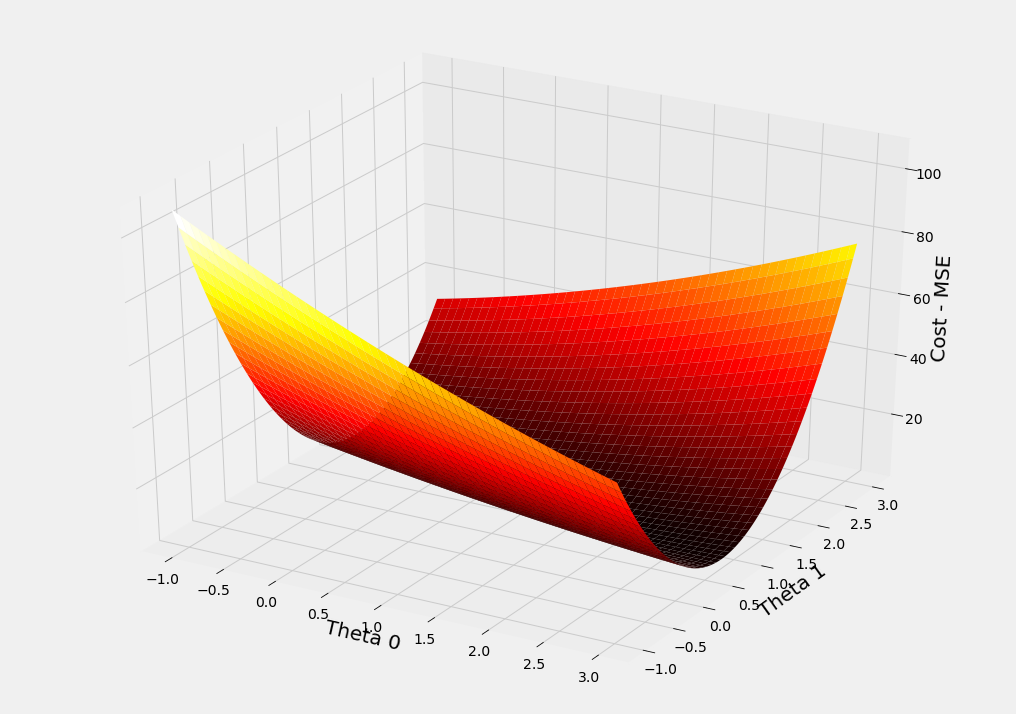

In [0]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [0]:
print('Min value of plot_cost:', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occures at (i, j):', ij_min)
print('Min MSE for Theta 0 at plo_t0[106][115]', plot_t0[106][115])
print('Min MSE fot Theta 1 at plot_t1[106][115]', plot_t1[106][115])

Min value of plot_cost: 1.1080286933591144
Min occures at (i, j): (106, 115)
Min MSE for Theta 0 at plo_t0[106][115] 1.3115577889447239
Min MSE fot Theta 1 at plot_t1[106][115] 1.1306532663316582


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


### __Partial Derivatives of MSE wrt $\theta_0$ and $\theta_1$__
#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

### __MSE & Gradient Descent__

In [0]:
# x values, e values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
  n = y.size
  theta0_slope = (-2/n) * sum(y - thetas[0] - thetas [1] * x)
  theta1_slope = (-2/n) * sum((y - thetas[0] - thetas [1] * x)*x)

  # return np.array([theta0_slope[0], theta1_slope[0]]) # option 1
  # return np.append(arr=theta0_slope, values=theta1_slope) # option 2
  return np.concatenate((theta0_slope, theta1_slope), axis=0) # option 3


In [0]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
  thetas = thetas - multiplier * grad(x_5, y_5, thetas)

  # Append the new values to pur numpy arrays
  plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
  mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0: 1.340742098307278
Min occurs at Theta 1: 1.1224424255894099
MSE is: [1.10769076]


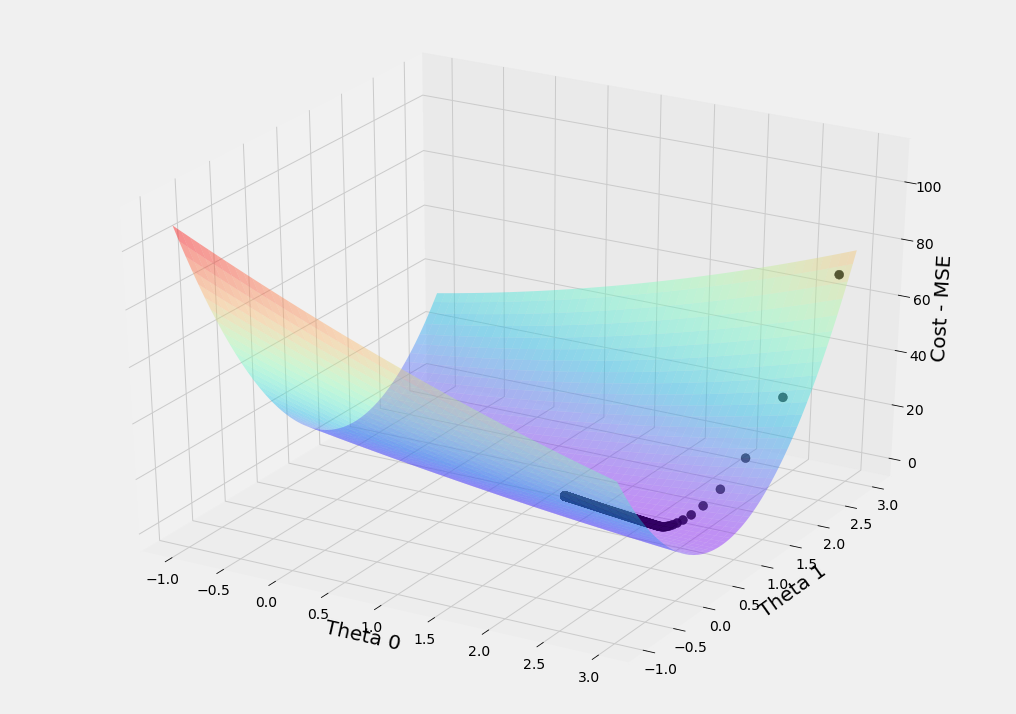

In [0]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()